In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import numpy as np
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [4]:
data=pd.read_csv("D:\Excel R\Assignments\Assignment 11\Alexa reviews.csv")

In [5]:
data

rating       date         variation  \
0          5  31-Jul-18  Charcoal Fabric    
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                                                 ...       ...  
3145  Perfect for kids, adults and everyone in betwe...         1  
3146  Listening to music, searching locations, check...         1  
3147  I do love these things, i have them running my...         1  
3148  Only complaint I have is that the sound qualit...         1  
3149                                               Good         1  

[3150 rows x 5 columns]

In [6]:
d1=data.drop(['rating','date','variation','feedback'],axis=1)
d1

verified_reviews
0                                         Love my Echo!
1                                             Loved it!
2     Sometimes while playing a game, you can answer...
3     I have had a lot of fun with this thing. My 4 ...
4                                                 Music
...                                                 ...
3145  Perfect for kids, adults and everyone in betwe...
3146  Listening to music, searching locations, check...
3147  I do love these things, i have them running my...
3148  Only complaint I have is that the sound qualit...
3149                                               Good

[3150 rows x 1 columns]

In [7]:
### Text Processing:-
d1=[verified_reviews.strip() for verified_reviews in d1.verified_reviews]
d1=[verified_reviews for verified_reviews in d1 if verified_reviews]
d1[0:10]

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.',
 'Music',
 'I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can�t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.',
 "I think this is the 5th one I've

In [24]:
### Joining the list into one string/text:-
d1_text=' '.join(d1)
d1_text

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can�t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [25]:
from nltk.tokenize import TweetTokenizer
tknzr=TweetTokenizer(strip_handles=True)
d1_tokens=tknzr.tokenize(d1_text)
print(d1_tokens)

['Love', 'my', 'Echo', '!', 'Loved', 'it', '!', 'Sometimes', 'while', 'playing', 'a', 'game', ',', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'Alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', '.', 'I', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home', '.', 'I', 'have', 'had', 'a', 'lot', 'of', 'fun', 'with', 'this', 'thing', '.', 'My', '4', 'yr', 'old', 'learns', 'about', 'dinosaurs', ',', 'i', 'control', 'the', 'lights', 'and', 'play', 'games', 'like', 'categories', '.', 'Has', 'nice', 'sound', 'when', 'playing', 'music', 'as', 'well', '.', 'Music', 'I', 'received', 'the', 'echo', 'as', 'a', 'gift', '.', 'I', 'needed', 'another', 'Bluetooth', 'or', 'something', 'to', 'play', 'music', 'easily', 'accessible', ',', 'and', 'found', 'this', 'smart', 'speaker', '.', 'Can', '�', 't', 'wait', 'to', 'see', 'what', 'else', 'it', 'can', 'do', '.', 'Without', 'having', 'a', 'cellphone',

In [26]:
d1_tokens_text=' '.join(d1_tokens)
d1_tokens_text

'Love my Echo ! Loved it ! Sometimes while playing a game , you can answer a question correctly but Alexa says you got it wrong and answers the same as you . I like being able to turn lights on and off while away from home . I have had a lot of fun with this thing . My 4 yr old learns about dinosaurs , i control the lights and play games like categories . Has nice sound when playing music as well . Music I received the echo as a gift . I needed another Bluetooth or something to play music easily accessible , and found this smart speaker . Can � t wait to see what else it can do . Without having a cellphone , I cannot use many of her features . I have an iPad but do not see that of any use . It IS a great alarm . If u r almost deaf , you can hear her alarm in the bedroom from out in the living room , so that is reason enough to keep her.It is fun to ask random questions to hear her response . She does not seem to be very smartbon politics yet . I think this is the 5th one I\'ve purchase

In [27]:
no_punc_text=d1_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Love my Echo  Loved it  Sometimes while playing a game  you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home  I have had a lot of fun with this thing  My 4 yr old learns about dinosaurs  i control the lights and play games like categories  Has nice sound when playing music as well  Music I received the echo as a gift  I needed another Bluetooth or something to play music easily accessible  and found this smart speaker  Can � t wait to see what else it can do  Without having a cellphone  I cannot use many of her features  I have an iPad but do not see that of any use  It IS a great alarm  If u r almost deaf  you can hear her alarm in the bedroom from out in the living room  so that is reason enough to keep herIt is fun to ask random questions to hear her response  She does not seem to be very smartbon politics yet  I think this is the 5th one Ive purchased  Im working on getting

In [31]:
import re
no_url_text=re.sub(r'http\S+','',no_punc_text)
no_url_text

'Love my Echo  Loved it  Sometimes while playing a game  you can answer a question correctly but Alexa says you got it wrong and answers the same as you  I like being able to turn lights on and off while away from home  I have had a lot of fun with this thing  My 4 yr old learns about dinosaurs  i control the lights and play games like categories  Has nice sound when playing music as well  Music I received the echo as a gift  I needed another Bluetooth or something to play music easily accessible  and found this smart speaker  Can � t wait to see what else it can do  Without having a cellphone  I cannot use many of her features  I have an iPad but do not see that of any use  It IS a great alarm  If u r almost deaf  you can hear her alarm in the bedroom from out in the living room  so that is reason enough to keep herIt is fun to ask random questions to hear her response  She does not seem to be very smartbon politics yet  I think this is the 5th one Ive purchased  Im working on getting

In [32]:
import nltk
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['Love', 'my', 'Echo', 'Loved', 'it', 'Sometimes', 'while', 'playing', 'a', 'game', 'you', 'can', 'answer', 'a', 'question', 'correctly', 'but', 'Alexa', 'says', 'you', 'got', 'it', 'wrong', 'and', 'answers', 'the', 'same', 'as', 'you', 'I', 'like', 'being', 'able', 'to', 'turn', 'lights', 'on', 'and', 'off', 'while', 'away', 'from', 'home', 'I', 'have', 'had', 'a', 'lot', 'of', 'fun', 'with', 'this', 'thing', 'My', '4', 'yr', 'old', 'learns', 'about', 'dinosaurs', 'i', 'control', 'the', 'lights', 'and', 'play', 'games', 'like', 'categories', 'Has', 'nice', 'sound', 'when', 'playing', 'music', 'as', 'well', 'Music', 'I', 'received', 'the', 'echo', 'as', 'a', 'gift', 'I', 'needed', 'another', 'Bluetooth', 'or', 'something', 'to', 'play', 'music', 'easily', 'accessible', 'and', 'found', 'this', 'smart', 'speaker', 'Can', '�', 't', 'wait', 'to', 'see', 'what', 'else', 'it', 'can', 'do', 'Without', 'having', 'a', 'cellphone', 'I', 'can', 'not', 'use', 'many', 'of', 'her', 'features', 'I', 

In [33]:
### Tokenizaton
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\CHINMAY
[nltk_data]     KULKARNI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\CHINMAY
[nltk_data]     KULKARNI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
### Tokens count:-
len(text_tokens)

80850

In [35]:
### Remove Stopwords:-
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list=['�','rt','ye','yeah','haha','Yes','U0001F923','I']
my_stop_words.extend(sw_list)
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Love', 'Echo', 'Loved', 'Sometimes', 'playing', 'game', 'answer', 'question', 'correctly', 'Alexa', 'says', 'got', 'wrong', 'answers', 'like', 'able', 'turn', 'lights', 'away', 'home', 'lot', 'fun', 'thing', 'My', '4', 'yr', 'old', 'learns', 'dinosaurs', 'control', 'lights', 'play', 'games', 'like', 'categories', 'Has', 'nice', 'sound', 'playing', 'music', 'well', 'Music', 'received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can', 'wait', 'see', 'else', 'Without', 'cellphone', 'use', 'many', 'features', 'iPad', 'see', 'use', 'It', 'IS', 'great', 'alarm', 'If', 'u', 'r', 'almost', 'deaf', 'hear', 'alarm', 'bedroom', 'living', 'room', 'reason', 'enough', 'keep', 'herIt', 'fun', 'ask', 'random', 'questions', 'hear', 'response', 'She', 'seem', 'smartbon', 'politics', 'yet', 'think', '5th', 'one', 'Ive', 'purchased', 'Im', 'working', 'getting', 'one', 'every', 'room', 'house', 'really', 'like', 'f

In [36]:
### Normalize the data:-
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['ive', 'purchased', 'im', 'working', 'getting', 'one', 'every', 'room', 'house', 'really', 'like', 'features', 'offer', 'specifily', 'playing', 'music', 'echos', 'controlling', 'lights', 'throughout', 'house', 'looks', 'great', 'love', 'listened', 'songs', 'heard', 'since', 'childhood', 'get', 'news', 'weather', 'information', 'it', 'great', 'sent', '85', 'year', 'old', 'dad', 'talks', 'constantly', 'love', 'learning', 'knew', 'things', 'eveyday', 'still', 'figuring', 'everything', 'works', 'far', 'easy', 'use', 'understand', 'she', 'make', 'laugh', 'times', 'purchased', 'mother', 'knee', 'problems', 'give', 'something', 'trying', 'come', 'getting', 'around', 'fast', 'like', 'didshe', 'enjoys', 'little', 'big', 'things', 'alexa', 'play', 'song', 'what', 'time', 'cook', 'love', 'love', 'love', 'just', 'expected', 'love', 'wife', 'hates', 'really', 'happy', 'purchase', 'great', 'speaker', 'easy', 'set', 'we', 'using', 'alexa']


In [37]:
### Stemming:-
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[100:200])

['ive', 'purchas', 'im', 'work', 'get', 'one', 'everi', 'room', 'hous', 'realli', 'like', 'featur', 'offer', 'specifili', 'play', 'music', 'echo', 'control', 'light', 'throughout', 'hous', 'look', 'great', 'love', 'listen', 'song', 'heard', 'sinc', 'childhood', 'get', 'news', 'weather', 'inform', 'it', 'great', 'sent', '85', 'year', 'old', 'dad', 'talk', 'constantli', 'love', 'learn', 'knew', 'thing', 'eveyday', 'still', 'figur', 'everyth', 'work', 'far', 'easi', 'use', 'understand', 'she', 'make', 'laugh', 'time', 'purchas', 'mother', 'knee', 'problem', 'give', 'someth', 'tri', 'come', 'get', 'around', 'fast', 'like', 'didsh', 'enjoy', 'littl', 'big', 'thing', 'alexa', 'play', 'song', 'what', 'time', 'cook', 'love', 'love', 'love', 'just', 'expect', 'love', 'wife', 'hate', 'realli', 'happi', 'purchas', 'great', 'speaker', 'easi', 'set', 'we', 'use', 'alexa']


In [38]:
### Lemmatization:-
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

love echo loved sometimes playing game answer question correctly alexa says got wrong answers like able turn lights away home lot fun thing my 4 yr old learns dinosaurs control lights play games like categories has nice sound playing music well music received echo gift needed another bluetooth something play music easily accessible found smart speaker can wait see else without cellphone use many features ipad see use it is great alarm if u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random questions hear response she seem smartbon politics yet think 5th one ive purchased im working getting one every room house really like features offer specifily playing music echos controlling lights throughout house looks great love listened songs heard since childhood get news weather information it great sent 85 year old dad talks constantly love learning knew things eveyday still figuring everything works far easy use understand she make laugh times purchased moth

In [39]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['love', 'echo', 'love', 'sometimes', 'play', 'game', 'answer', 'question', 'correctly', 'alexa', 'say', 'get', 'wrong', 'answer', 'like', 'able', 'turn', 'light', 'away', 'home', 'lot', 'fun', 'thing', 'my', '4', 'yr', 'old', 'learn', 'dinosaur', 'control', 'light', 'play', 'game', 'like', 'category', 'have', 'nice', 'sound', 'play', 'music', 'well', 'music', 'receive', 'echo', 'gift', 'need', 'another', 'bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'find', 'smart', 'speaker', 'can', 'wait', 'see', 'else', 'without', 'cellphone', 'use', 'many', 'feature', 'ipad', 'see', 'use', 'it', 'be', 'great', 'alarm', 'if', 'u', 'r', 'almost', 'deaf', 'hear', 'alarm', 'bedroom', 'living', 'room', 'reason', 'enough', 'keep', 'herit', 'fun', 'ask', 'random', 'question', 'hear', 'response', 'she', 'seem', 'smartbon', 'politic', 'yet', 'think', '5th', 'one', 'I', 've', 'purchase', 'I', 'm', 'work', 'get', 'one', 'every', 'room', 'house', 'really', 'like', 'feature', 'offer', 'spe

In [59]:
clean_reviews=' '.join(lemmas)
clean_reviews

'love echo love sometimes play game answer question correctly alexa say get wrong answer like able turn light away home lot fun thing my 4 yr old learn dinosaur control light play game like category have nice sound play music well music receive echo gift need another bluetooth something play music easily accessible find smart speaker can wait see else without cellphone use many feature ipad see use it be great alarm if u r almost deaf hear alarm bedroom living room reason enough keep herit fun ask random question hear response she seem smartbon politic yet think 5th one I ve purchase I m work get one every room house really like feature offer specifily play music echos control light throughout house look great love listen song hear since childhood get news weather information it great send 85 year old dad talk constantly love learn know thing eveyday still figure everything work far easy use understand she make laugh time purchase mother knee problem give something try come get around 

In [60]:
### Feature Extraction:-
### Using Count-Vectorizer:-
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [61]:
print(cv.vocabulary_)

{'love': 1782, 'echo': 973, 'sometimes': 2728, 'play': 2207, 'game': 1256, 'answer': 237, 'question': 2338, 'correctly': 715, 'alexa': 180, 'say': 2532, 'get': 1280, 'wrong': 3338, 'like': 1733, 'able': 80, 'turn': 3088, 'light': 1727, 'away': 327, 'home': 1435, 'lot': 1777, 'fun': 1238, 'thing': 2974, 'my': 1929, 'yr': 3358, 'old': 2038, 'learn': 1705, 'dinosaur': 880, 'control': 694, 'category': 533, 'have': 1381, 'nice': 1969, 'sound': 2747, 'music': 1922, 'well': 3267, 'receive': 2386, 'gift': 1286, 'need': 1949, 'another': 236, 'bluetooth': 426, 'something': 2726, 'easily': 969, 'accessible': 91, 'find': 1172, 'smart': 2690, 'speaker': 2763, 'can': 510, 'wait': 3227, 'see': 2570, 'else': 1008, 'without': 3311, 'cellphone': 543, 'use': 3163, 'many': 1826, 'feature': 1154, 'ipad': 1602, 'it': 1616, 'be': 366, 'great': 1330, 'alarm': 172, 'if': 1479, 'almost': 195, 'deaf': 790, 'hear': 1398, 'bedroom': 378, 'living': 1750, 'room': 2496, 'reason': 2380, 'enough': 1031, 'keep': 1649, '

In [62]:
print(cv.get_feature_names()[100:200])

['accomplish', 'accord', 'accordingly', 'account', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'action', 'activate', 'activation', 'actively', 'activity', 'actually', 'ad', 'adapt', 'adapter', 'add', 'added', 'addict', 'addicted', 'addition', 'additional', 'additionally', 'addon', 'address', 'adept', 'adequate', 'adjacent', 'adjust', 'adjusting', 'adjustment', 'admit', 'adopter', 'adorable', 'adult', 'advance', 'advanced', 'advantage', 'advertise', 'advertised', 'advertisement', 'advertising', 'advice', 'advise', 'aesthetic', 'af', 'affirmation', 'affirmcom', 'afford', 'affordable', 'afraid', 'after', 'afternoon', 'afterwards', 'again', 'age', 'agent', 'ago', 'agree', 'agreement', 'ahead', 'ai', 'aide', 'air', 'aka', 'al', 'alabama', 'alarm', 'alarmcom', 'alarmit', 'alarmthis', 'albeit', 'alcohol', 'alert', 'alex', 'alexa', 'alexaalso', 'alexas', 'alexi', 'alexia', 'alexis', 'alexus', 'algo', 'alive', 'all', 'alleviate', 'allinone', '

In [63]:
print(reviewscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [64]:
print(reviewscv.toarray().shape)

(43640, 3366)


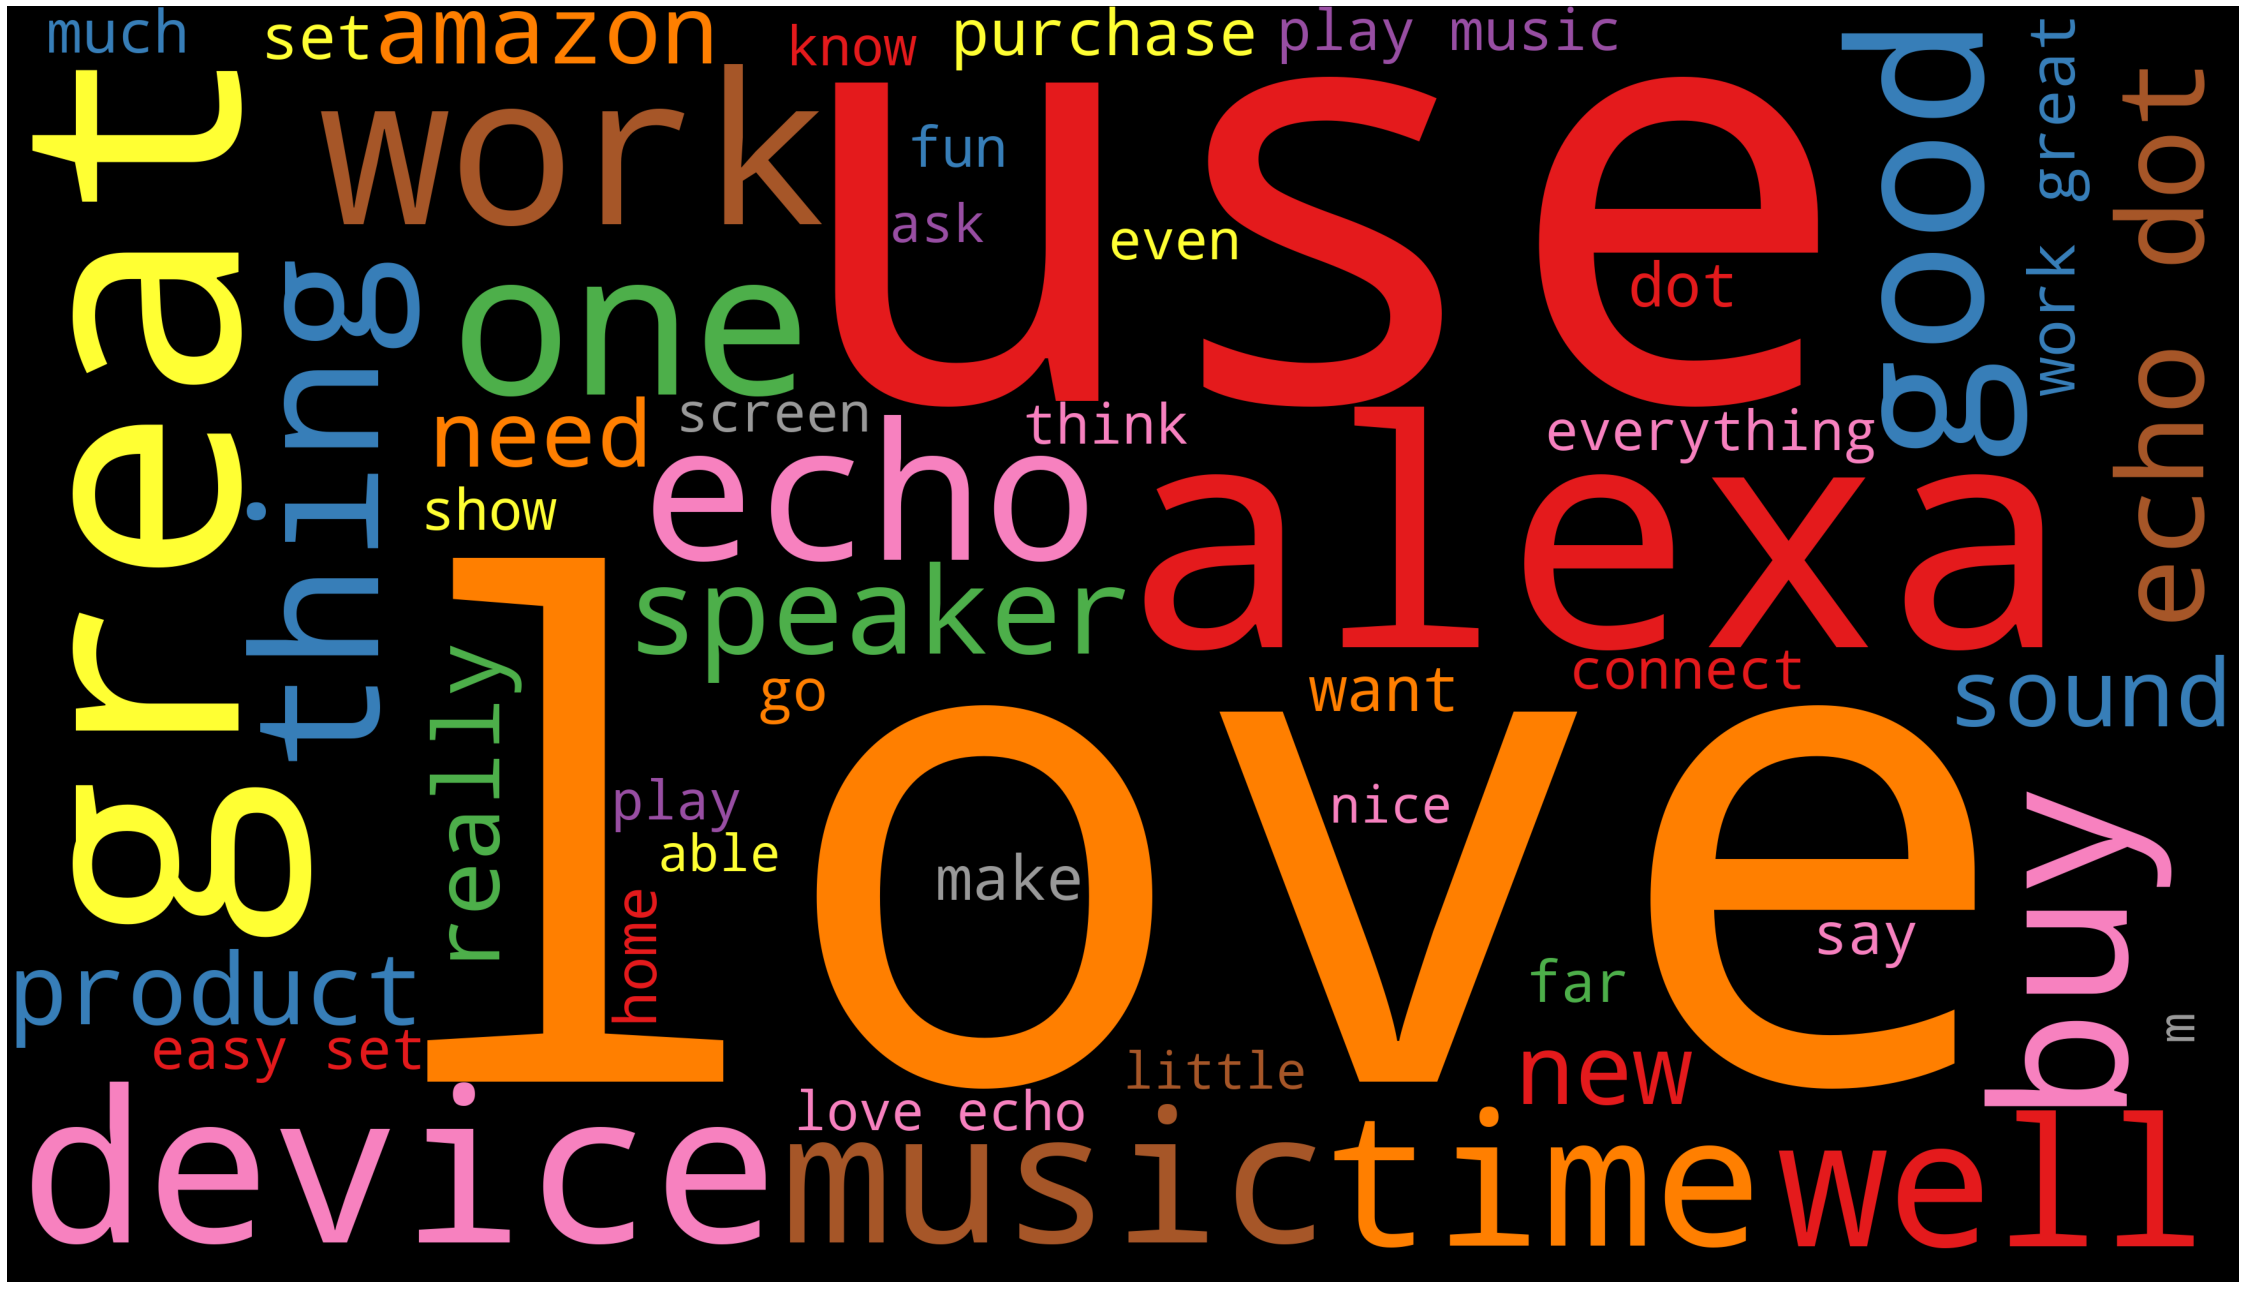

In [65]:
### Generate Word-Cloud:-
### Define a function to plot word cloud:-
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

### Generate Word-Cloud:-
STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3500,height=2000,background_color='black',max_words=50,colormap='Set1',
                   stopwords=STOPWORDS).generate(clean_tweets)
plot_cloud(wordcloud)

In [47]:
### Emotion Mining:-
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(d1))
sentences

['Love my Echo!',
 'Loved it!',
 'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.',
 'I like being able to turn lights on and off while away from home.',
 'I have had a lot of fun with this thing.',
 'My 4 yr old learns about dinosaurs, i control the lights and play games like categories.',
 'Has nice sound when playing music as well.',
 'Music I received the echo as a gift.',
 'I needed another Bluetooth or something to play music easily accessible, and found this smart speaker.',
 'Can�t wait to see what else it can do.',
 'Without having a cellphone, I cannot use many of her features.',
 'I have an iPad but do not see that of any use.',
 'It IS a great alarm.',
 'If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.',
 'She does not seem to be very smartbon politics yet.',
 "I th

In [48]:
sent_df=pd.DataFrame(sentences,columns=['sentences'])
sent_df

sentences
0                                         Love my Echo!
1                                             Loved it!
2     Sometimes while playing a game, you can answer...
3     I like being able to turn lights on and off wh...
4              I have had a lot of fun with this thing.
...                                                 ...
6206  I named mine computer to get the feel... but i...
6207  Only complaint I have is that the sound qualit...
6208  I mostly use it for commands though, and I hav...
6209  I have a couple friends that have a dot and do...
6210                                               Good

[6211 rows x 1 columns]

In [49]:
### Emotion Lexicon - Affin:-
affin=pd.read_csv("D:\Excel R\Assignments\Assignment 11\Afinn.csv",sep=',',encoding='Latin-1')
affin

word  value
0       abandon     -2
1     abandoned     -2
2      abandons     -2
3      abducted     -2
4     abduction     -2
...         ...    ...
2472      yucky     -2
2473      yummy      3
2474     zealot     -2
2475    zealots     -2
2476    zealous      2

[2477 rows x 2 columns]

In [50]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [51]:
### Custom function:- Score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence:-
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores
 
def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
        return sent_score

In [52]:
### Manual Testing:-
calculate_sentiment(text='great')

3

In [53]:
### Calculate sentiment value for each sentence:-
sent_df['sentiment_value']=sent_df['sentences'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       3
1       3
2      -2
3       2
4       4
       ..
6206    5
6207    3
6208    0
6209    0
6210    3
Name: sentiment_value, Length: 6211, dtype: int64

In [54]:
### How many words are there in a sentence?
sent_df['word_count']=sent_df['sentences'].str.split().apply(len)
sent_df['word_count']

0        3
1        2
2       24
3       14
4       10
        ..
6206    21
6207    11
6208    22
6209    43
6210     1
Name: word_count, Length: 6211, dtype: int64

In [55]:
sent_df.sort_values(by='sentiment_value')

sentences  sentiment_value  \
2570  YES, you can manually swipe up on the alarm fa...              -10   
1210  Wish alarms could be set a bit further out but...               -8   
4212  I'm not even going to open it and see how bad ...               -6   
949   Was a little hard to get it to pare up with th...               -6   
3211  Don't get me wrong I don't regret buying it es...               -6   
...                                                 ...              ...   
2694  What a wonderful little Alexa enabled gadget a...               18   
5649  Love this thing works great and kids love it t...               18   
5065  Love this thing works great and kids love it t...               18   
443   Great sound from a little speaker We enjoy it ...               18   
4338  Alexa helps with more than just lights or musi...               21   

      word_count  
2570         111  
1210          34  
4212          14  
949           44  
3211          29  
...          ...  
2694          21  
5649          43  
5065          43  
443           19  
4338         141  

[6211 rows x 3 columns]

In [56]:
### Sentiment score of the whole review:-
sent_df['sentiment_value'].describe()

count    6211.000000
mean        1.793592
std         2.626736
min       -10.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        21.000000
Name: sentiment_value, dtype: float64

In [57]:
### Negative sentiment score of the whole review:-
sent_df[sent_df['sentiment_value']<=0]

sentences  sentiment_value  \
2     Sometimes while playing a game, you can answer...               -2   
9                Can�t wait to see what else it can do.                0   
10    Without having a cellphone, I cannot use many ...                0   
11       I have an iPad but do not see that of any use.                0   
14    She does not seem to be very smartbon politics...                0   
...                                                 ...              ...   
6201  Listening to music, searching locations, check...                0   
6202                 There are many more task to learn.                0   
6203                           It was simple to set up.                0   
6208  I mostly use it for commands though, and I hav...                0   
6209  I have a couple friends that have a dot and do...                0   

      word_count  
2             24  
9              9  
10            11  
11            12  
14            10  
...          ...  
6201          10  
6202           7  
6203           6  
6208          22  
6209          43  

[2588 rows x 3 columns]

In [58]:
### Positive sentiment score of the whole review:-
sent_df[sent_df['sentiment_value']>0]

sentences  sentiment_value  \
0                                         Love my Echo!                3   
1                                             Loved it!                3   
3     I like being able to turn lights on and off wh...                2   
4              I have had a lot of fun with this thing.                4   
5     My 4 yr old learns about dinosaurs, i control ...                2   
...                                                 ...              ...   
6204  I do love these things, i have them running my...                3   
6205  these things are well worth the value and they...                5   
6206  I named mine computer to get the feel... but i...                5   
6207  Only complaint I have is that the sound qualit...                3   
6210                                               Good                3   

      word_count  
0              3  
1              2  
3             14  
4             10  
5             16  
...          ...  
6204          31  
6205          31  
6206          21  
6207          11  
6210           1  

[3623 rows x 3 columns]